### CSAI 801 Project: COVID-19 Outcome Prediction
` this dataset to measure The data used in this project will help to identify whether a person is going to recover from
coronavirus symptoms or not based on some pre-defined standard symptoms`
#### columns 
1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear:
14. Result: death (1) or recovered (0)
**as presented below**
- constains 14 feature and 863 sample with imbalanced class skwed towords the 0 class 
- all the data is cleaned there is no null values only two negative values in `diff_sym_hos` so we ignore this two values 

In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from six import StringIO
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing, base, metrics
from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, f1_score, precision_recall_curve, roc_curve, classification_report
from sklearn.feature_selection import SelectKBest, chi2
import warnings
warnings.filterwarnings("ignore")

### Data Exploratory Analysis

In [80]:
df = pd.read_csv("data.csv")
data = df.copy()
df = df.iloc[:,1:]

`read data `

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [82]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


`show the percentage of null values`

In [83]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

location        0.0
country         0.0
gender          0.0
age             0.0
vis_wuhan       0.0
from_wuhan      0.0
symptom1        0.0
symptom2        0.0
symptom3        0.0
symptom4        0.0
symptom5        0.0
symptom6        0.0
diff_sym_hos    0.0
result          0.0
dtype: float64

`show the classes and count for each class `

<AxesSubplot:>

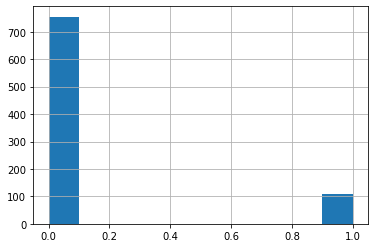

In [84]:
# imbalanced 
df["result"].hist()

0    0.874855
1    0.125145
Name: result, dtype: float64

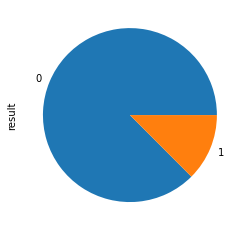

In [85]:
data['result'].value_counts().plot.pie()
data['result'].value_counts(normalize=True) 

In [86]:
df["gender"] = df["gender"].astype("object")
df["country"] = df["country"].astype("object")
df["location"] = df["location"].astype("object");

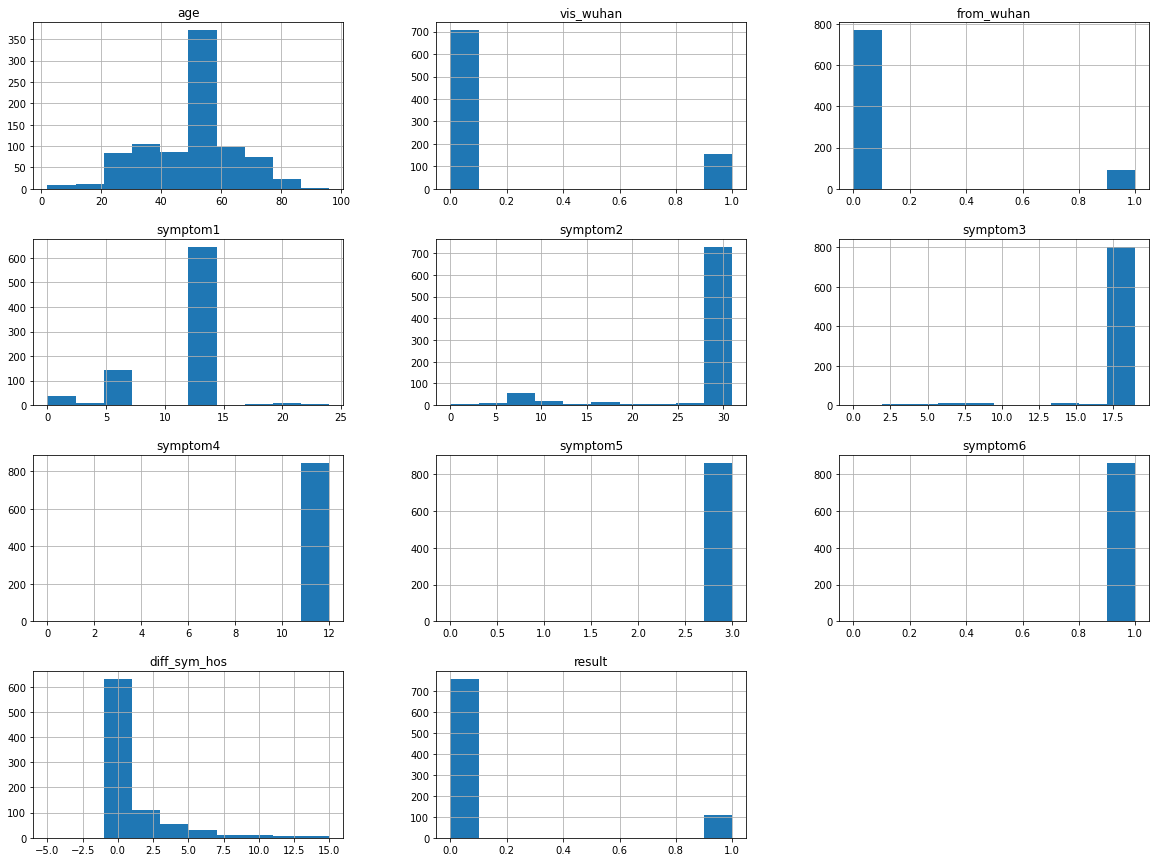

In [87]:
df.iloc[:,2:].hist( figsize=(20, 15));

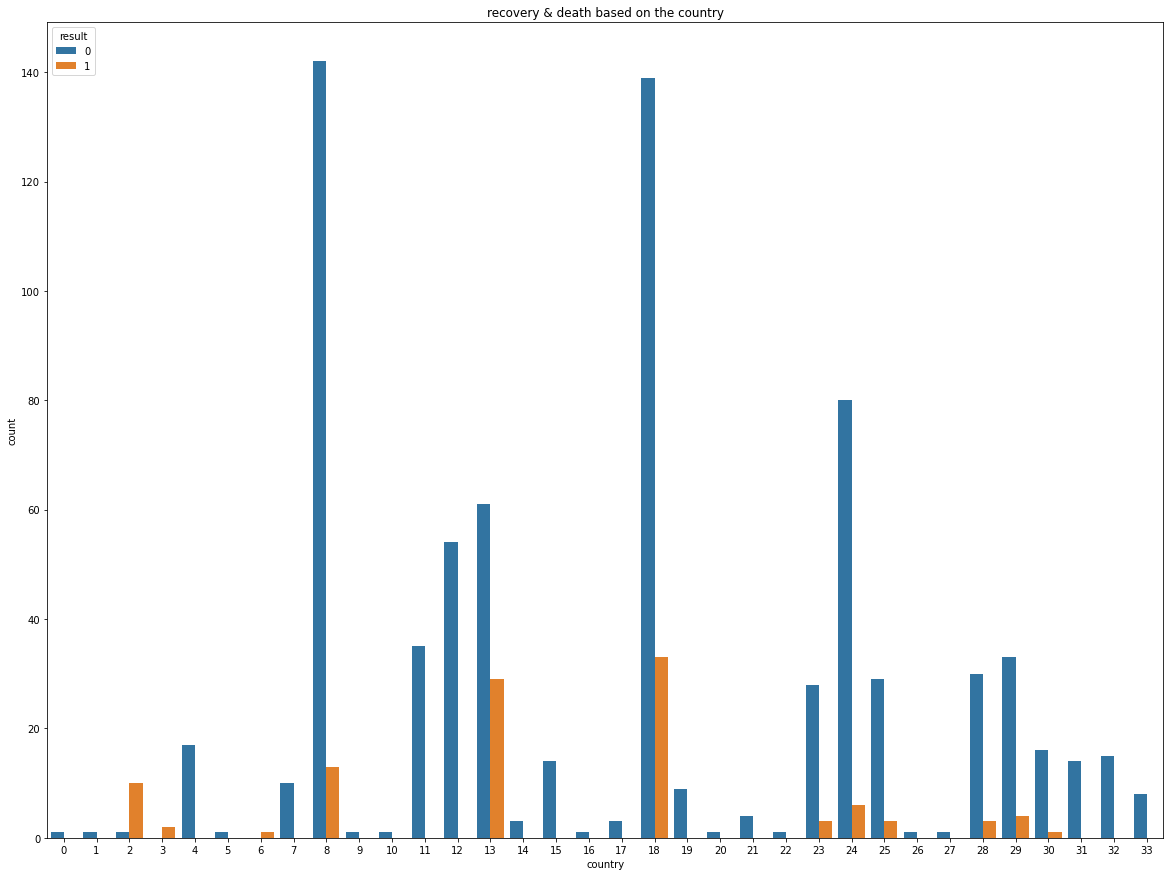

In [88]:
fig = plt.figure(figsize=(20, 15))
ax = sns.countplot(x= "country", hue= "result", data= df);
ax.set_title("recovery & death based on the country");

        there is three contries with high death patient

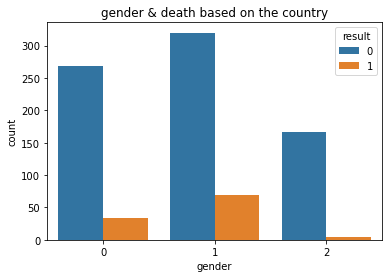

In [89]:
ax = sns.countplot(x= "gender", hue= "result", data= df);
ax.set_title("gender & death based on the country");

        there is no preferences based on the gender type they have the same distrbution

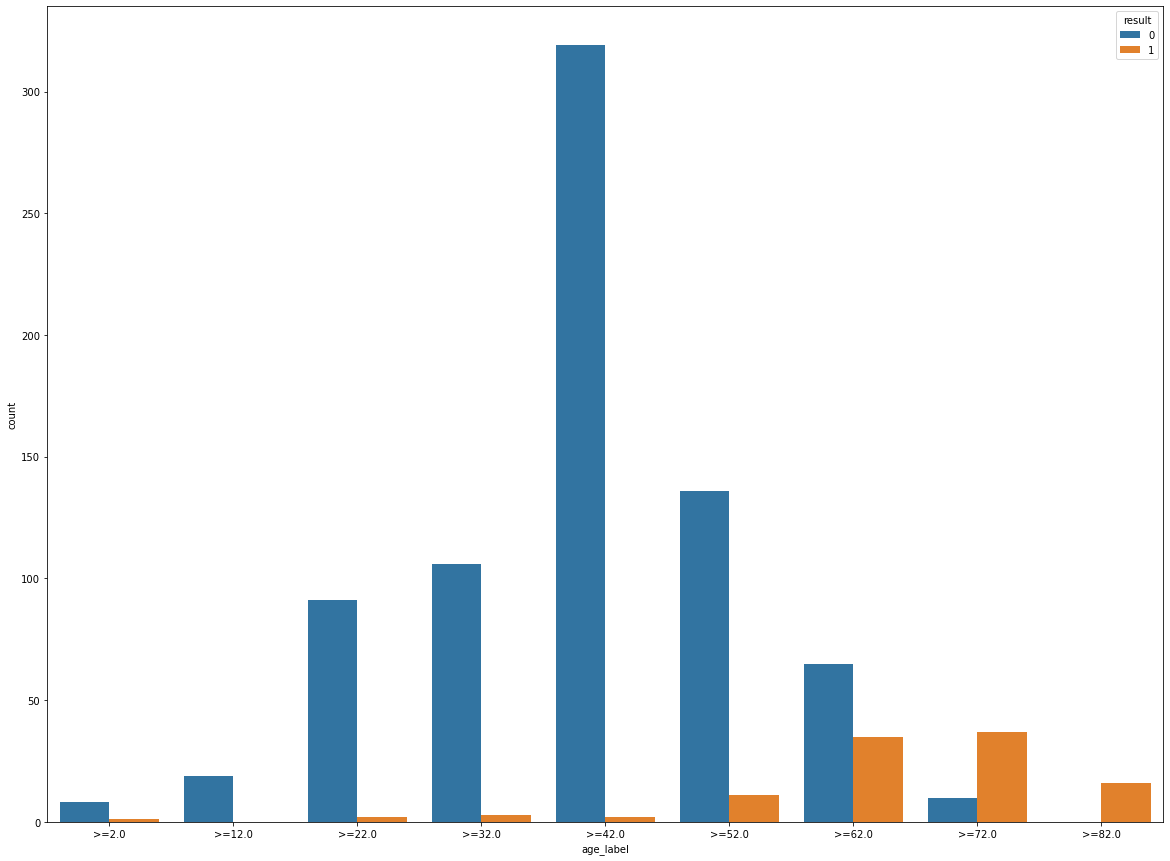

In [90]:
age_ranges = np.arange(data['age'].min(), data["age"].max(), 10)
age_labels =  [f">={age_ranges[i-1]}" for i in range(1,age_ranges.shape[0])]
age_ranges.shape, len(age_labels)
data["age_label"] = pd.cut(data["age"], bins= age_ranges,labels= age_labels)

fig = plt.figure(figsize=(20, 15))
sns.countplot(x="age_label", hue= "result", data= data)
ax.set_title("recovery & death based on the country");

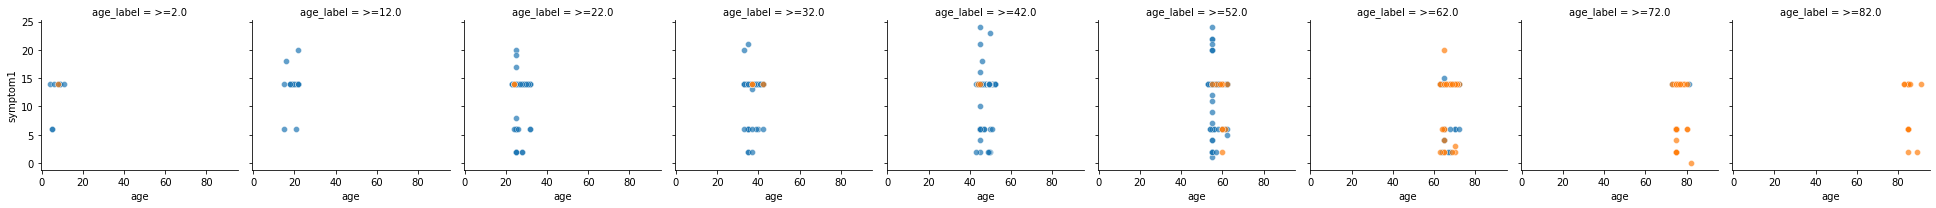

In [91]:
g = sns.FacetGrid(data ,col="age_label", hue="result")
g.map(sns.scatterplot, "age", "symptom1",alpha=.7);

        the death count increase in the age greater than 50 become more 

## show the distribution of each numerical value
- the distribution below almost give us indication that numeric values are symmetric

<Figure size 432x288 with 0 Axes>

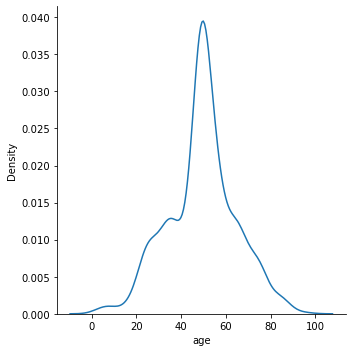

<Figure size 432x288 with 0 Axes>

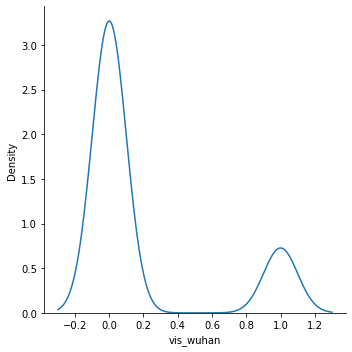

<Figure size 432x288 with 0 Axes>

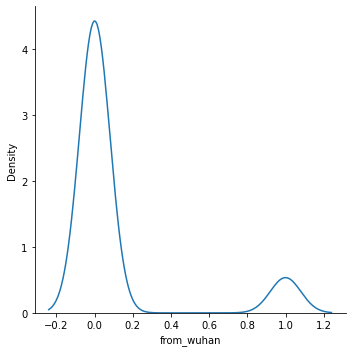

<Figure size 432x288 with 0 Axes>

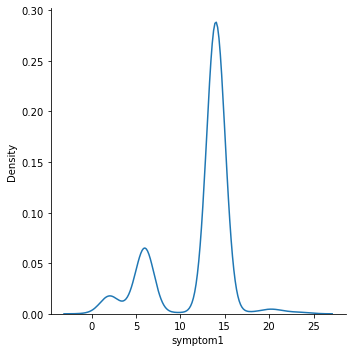

<Figure size 432x288 with 0 Axes>

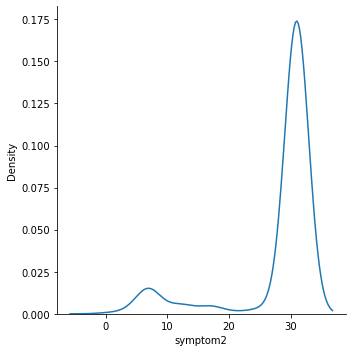

<Figure size 432x288 with 0 Axes>

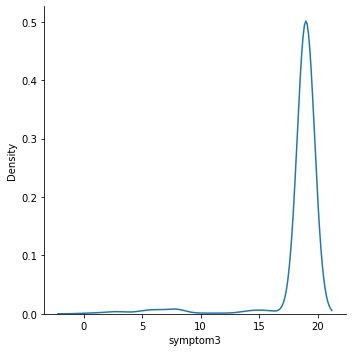

<Figure size 432x288 with 0 Axes>

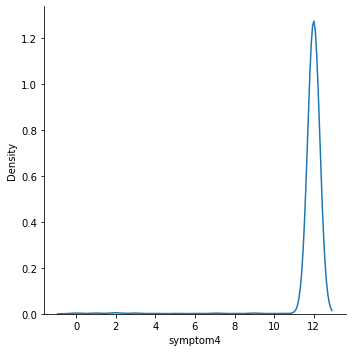

<Figure size 432x288 with 0 Axes>

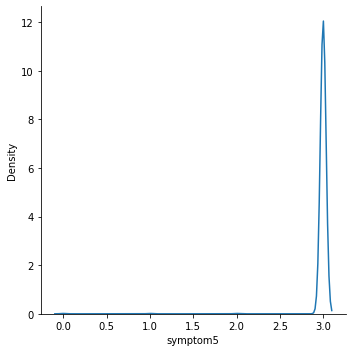

<Figure size 432x288 with 0 Axes>

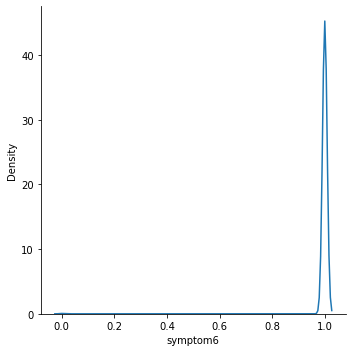

<Figure size 432x288 with 0 Axes>

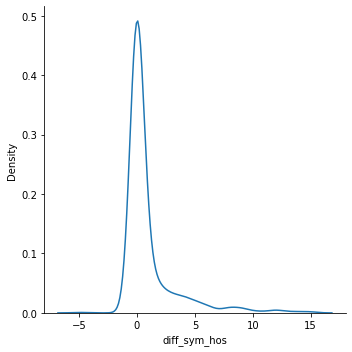

<Figure size 432x288 with 0 Axes>

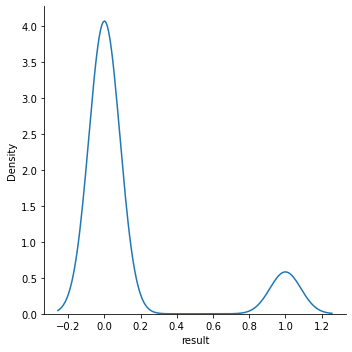

In [92]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=5)
    plt.show();

`show the quantitve data description`

In [93]:
for col in df.select_dtypes("object"):
    print(f'{col :-<20} {df[col].unique()}')

location------------ [104 101 137 116 23 105 13 100 135 53 71 67 29 35 102 83 33 42 39 52 41 54
 46 31 103 132 47 99 40 17 88 27 6 4 109 96 25 68 79 76 18 70 16 82 117 1
 80 44 87 75 51 64 37 22 128 86 56 95 97 78 30 59 60 49 77 32 73 106 108
 98 110 114 19 8 74 131 113 38 115 126 127 125 92 107 118 124 90 12 28 9
 120 85 36 93 43 121 45 133 119 58 63 62 138 26 130 81 94 134 69 122 84
 129 57 2 89 65 112 11 72 20 5 123 21 136 55 14 7 91 111 34 50 66 61 10 48
 0 3 24 15]
country------------- [8 11 18 21 23 24 28 29 32 33 2 7 6 12 30 13 17 31 14 22 10 25 26 5 15 16
 20 19 4 3 0 1 9 27]
gender-------------- [1 0 2]


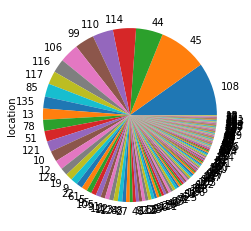

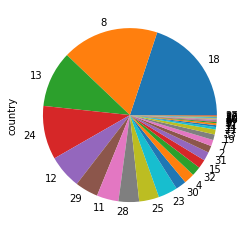

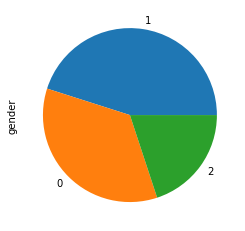

In [94]:
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.show()

In [95]:
featureList = ['location','country','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']
for i in featureList:
    print(f"{i} \t {df[i].nunique()}")
    

location 	 139
country 	 34
symptom1 	 25
symptom2 	 32
symptom3 	 20
symptom4 	 13
symptom5 	 4
symptom6 	 2
diff_sym_hos 	 18


`remove the negative values in the data `

In [96]:
df[df.diff_sym_hos < 0]

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
223,56,18,1,35.0,0,0,6,31,19,12,3,1,-1,0
240,128,18,1,65.0,0,0,6,31,19,12,3,1,-5,0


In [97]:
df = df[~df.diff_sym_hos < 0]

In [98]:
df.drop("gender",axis = 1, inplace=True) 

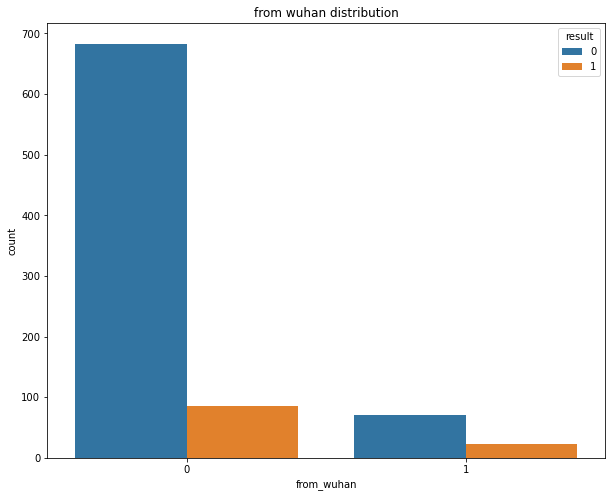

In [99]:
fig = plt.figure(figsize=(10, 8))
ax = sns.countplot(x= "from_wuhan", hue= "result", data= df);
ax.set_title("from wuhan distribution");

        there is no huge difference in the death distribution niether from wuhan of no 

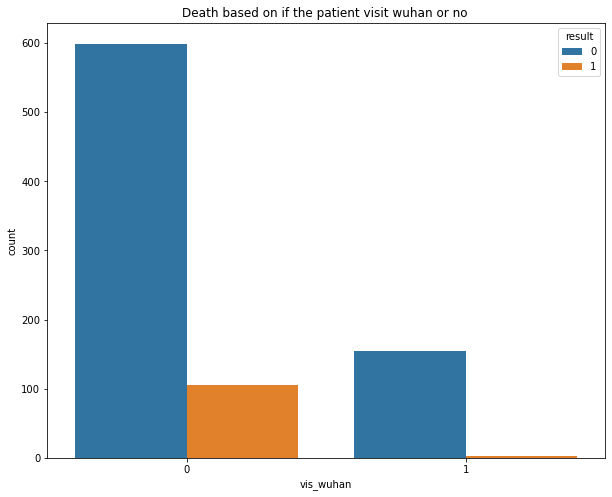

In [100]:
fig = plt.figure(figsize=(10, 8))
ax = sns.countplot(x= "vis_wuhan", hue= "result", data= df);
ax.set_title("Death based on if the patient visit wuhan or no ");

        there is no impact on either the patient visit wuhan or no

***
### Data Preprocessing

In [101]:
y = df.iloc[:, -1:]
df.drop(columns=["result"], inplace= True)

In [102]:
categorical_columns = ['location','country']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
X = df.iloc[:,:-1]

In [103]:
d = preprocessing.normalize(X)

names = X.columns.values.tolist()
scaled_df = pd.DataFrame(d, columns = names)
X_new = SelectKBest(chi2, k = "all").fit_transform(scaled_df, y)
X_new.shape

(861, 182)

In [104]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state=3)

***
### ML

#### Key challenge 
    the given dataset has imbalanced classes skewed towardes class-zero where the majortiy is from this class and class-one has a very low distribution so our algorithms suffered from this skewed data and can't define the main feature to deal with.
    
   **the main challenge** here is that we alwayes get high accuracy model becasue the prior of the data influence on the main feature that we need those models descriped as **naive behaviour** 
   <u>**the accuracy here doesn't have any meaning**</u> and we need other measure to define how the algorithm deal well with the given data there is set of example such as 
   - ##### Confusion matrix  
        when dealing with classification problem is the confusion matrix. This metric gives an interesting overview of how well a model is doing
        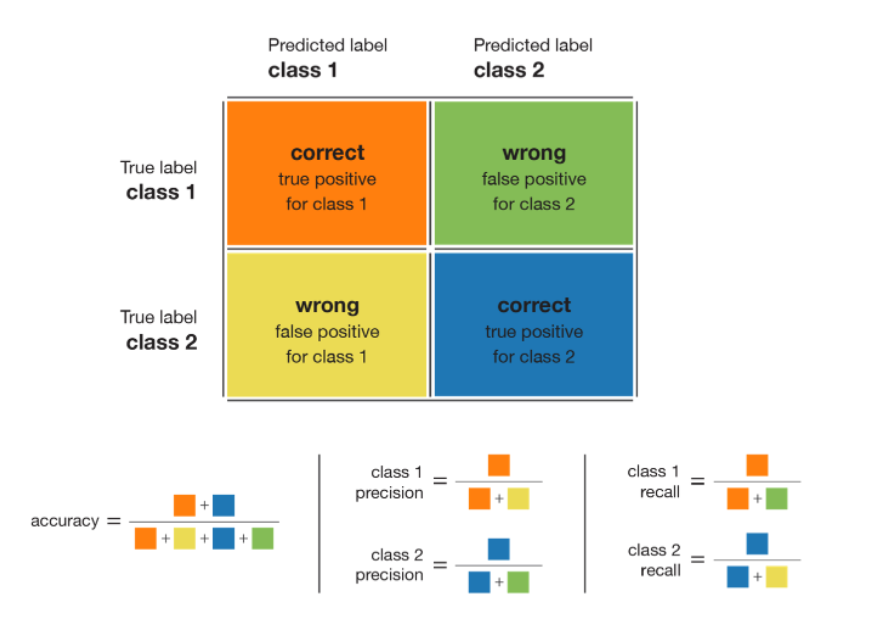
   - ##### Recall
       how many relevant items were selected, how many of the positive classes are correctly found.  
   - ##### precision
      
   - ##### F1 Score
        give by the harmonic mean of precision and recall (2×precision×recall / (precision + recall)), it combines precision and recall of a class in one metric.
       different combinations of recall and precision have the following meanings :
       - high recall + high precision : the class is perfectly handled by the model   
       - low recall + high precision : the model can’t detect the class well but is highly trustable when it does  
       - high recall + low precision : the class is well detected but the model also include points of other classes in it  
       - low recall + low precision : the class is poorly handled by the model 
   - ##### ROC
   
   **<u>the most important measure her for us is the recall which care about our positive calss that we care more about it</u>**
   - **<a id='knn'>K-Nearest Neighbors</a>** 
     - First
         we start with random key number which is 4 as show in the <a id='knn'>confusion matrix</a> give is 5 wrong values which is very close to the half of the positive dataset which is not mature enough to deal with it so we need other solutions to deal with this case 
     - Second 
       we begin tuning the model to find the best hyperparameter that give us the best measure and the more mature result 
       <a id='tuningknn'>**as described here**</a> which give us the best hyperparameter as define below give us better recall measure it is close to 75% from the positive prediction
       ```
       {
         'algorithm': 'auto',
         'leaf_size': 30,
         'metric': 'minkowski',
         'metric_params': None,
         'n_jobs': None,
         'n_neighbors': 1,
         'p': 2,
         'weights': 'distance'
       }
       ```
     
   - **<a id='logreg'>Logistic Regression</a>**
       - First 
           the defualt model used give us very poor measure to the positive class it is less the quarter which is not mature and can't be used in the live production, we need to do tuning to find the best hyperparameter to improve the results
           **High weighted feature** `['location_48', 'from_wuhan', 'location_92', 'country_2']` and doesn't take the symptems in consideration  
       - Second  
           We used the `GridSearchCv` with 7-folds to find the best hyperparameter that help us to get more accurate measure 
           <a id='logreg_tuning'>tuning description</a> after tuning we get the best hyperparameter 
           ```
           {'C': 7, 'dual': False, 'penalty': 'l2', 'solver': 'liblinear'}
           ```
           after tuning the model give us high preformance measure it became **`89%`**
           **High weighted feature** `['location_92', 'country_2', 'location_48', 'location_48']`
   - **Naïve Bayes**
   - **Decision Trees**
   - **Support Vector Machines**

In [106]:
models_desc = [] # model description

In [128]:
## Helper method 
def add_model_summary(model_name, model):
    model_desc = {"model": model_name}
    model_desc.update(predict_and_score(model))
    models_desc.append(model_desc)
    
def get_heighest_coefficiant(w_cof):
    x_w = list(range(w_cof.shape[1]))
    plt.stem(x_w, w_cof[0].flatten(), use_line_collection=True)
    w_flatten = w_cof.flatten()
    w_flatten.sort()
    largest_weight = w_flatten[-4:]
    heighest_weight = []
    for item in largest_weight:
        heighest_weight.append(np.where(w_cof == item)[1][0])
    print(f"height weight feature {[list(df.columns)[index] for index in heighest_weight]}")

def evaluate_measure(model, tuning= False): 
    """function used to evaluate the model and print the accuarcy and validation report data"""
    model.fit(X_train, y_train)
    # y_pred = model.predict(X_valid)
    # print(f" confusion_matrix: \n{confusion_matrix(y_valid, y_pred)}")
    # print(f"classification_report: \n{classification_report(y_valid, y_pred)}")
    # print(f"f1_score : \n{f1_score(y_valid, y_pred, average='binary') }")
    # metrics.plot_roc_curve(model, X_valid, y_valid)
    test_model(model)

def test_model(model):
    y_predict = model.predict(X_test)
    # print (f"Mean of correct prediction cases : {np.mean(y_test == y_predict)}")
    plot_confusion_matrix(model, X_test, y_test)
    # print(f" confusion_matrix: \n{confusion_matrix(y_test, y_predict)}")
    print(f"classification_report: \n{classification_report(y_test, y_predict)}")
    print(f"f1_score : \n{f1_score(y_test, y_predict, average='binary') }")
    metrics.plot_roc_curve(model, X_valid, y_valid)
    
def predict_and_score(clf, as_list= False):
    """
        clf: model 
        X: X_train data 
        y: label data
        return precision, recall, F1, roc_auc
    """
    y_predict = clf.predict(X_test)
    precision= precision_score(y_test, y_predict)
    recall = recall_score(y_test,y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)
    F1 = f1_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    result = {"accuracy": accuracy, "precision": precision, "recall" : recall, "F1": F1, "roc_auc": roc_auc}
    if as_list: return result.values()
    return result

***
### [KNN](#knn)

    tunning to find the best k in kkn

classification_report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        74
           1       0.70      0.58      0.64        12

    accuracy                           0.91        86
   macro avg       0.82      0.77      0.79        86
weighted avg       0.90      0.91      0.90        86

f1_score : 
0.6363636363636365


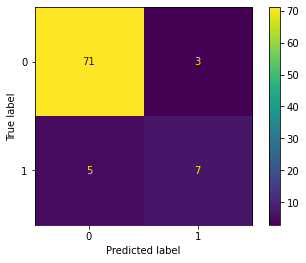

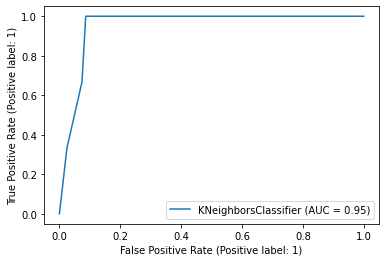

In [129]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
evaluate_measure(knn)
add_model_summary("Knn Before Tuning", knn)

### [Tuning Knn Model](#tuningknn)

In [130]:
dic = {'clf':[], 'recall':[], 'precision':[], 'f1':[], 'roc_auc':[]}
weights = ['distance', 'uniform']
for k in range(1, int(len(X_train) ** 0.5), 2):
    for weight in weights: 
        knn = KNeighborsClassifier(n_neighbors=k, weights= weight)
        knn.fit(X_train, y_train)
        accuracy, precision, recall, roc_auc, F1 = predict_and_score(knn, as_list= True)
        dic['clf'].append(knn)
        dic['recall'].append(recall)
        dic['precision'].append(precision)
        dic['f1'].append(F1)
        dic['roc_auc'].append(roc_auc)
        
knn_result = pd.DataFrame(dic)
best_knn_classifier =  knn_result.iloc[knn_result['recall'].idxmax(), 0]
print(best_knn_classifier.n_neighbors)

1


-------------------- Fit and Validate --------------------
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        74
           1       0.64      0.75      0.69        12

    accuracy                           0.91        86
   macro avg       0.80      0.84      0.82        86
weighted avg       0.91      0.91      0.91        86

f1_score : 
0.6923076923076924


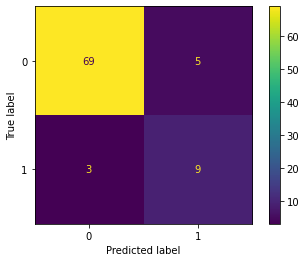

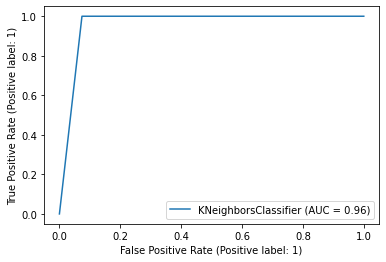

In [131]:
knn = best_knn_classifier # KNeighborsClassifier(n_neighbors=best_knn_classifier.n_neighbors)
knn.fit(X_train, y_train)
print(f"{'-'*20} Fit and Validate {'-'*20}")
evaluate_measure(knn)
add_model_summary("Knn after Tuning", knn)

In [133]:
neighbors = np.arange(1, 10)
y_list = []
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_score(knn, X_train, y_train, cv=10).mean()
    y_list.append(y_pred)
    if y_pred >= max(y_list):
        max_N = k
print(f"The best N is {max_N} with value {max(y_list)}")    

The best N is 1 with value 0.9215473145780051


classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        74
           1       0.64      0.75      0.69        12

    accuracy                           0.91        86
   macro avg       0.80      0.84      0.82        86
weighted avg       0.91      0.91      0.91        86

f1_score : 
0.6923076923076924


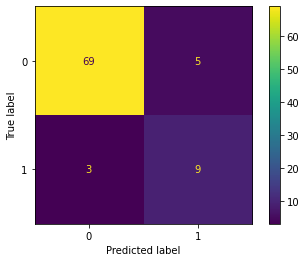

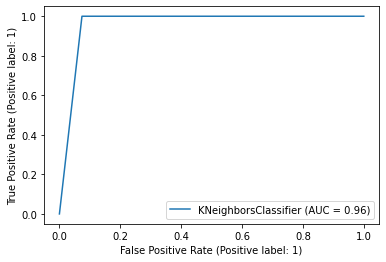

In [135]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'brute')
evaluate_measure(knn)


***
### [Logistic Regression](#logreg)

classification_report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        74
           1       1.00      0.17      0.29        12

    accuracy                           0.88        86
   macro avg       0.94      0.58      0.61        86
weighted avg       0.90      0.88      0.85        86

f1_score : 
0.2857142857142857



height weight feature ['country_13', 'location_45', 'diff_sym_hos', 'age']


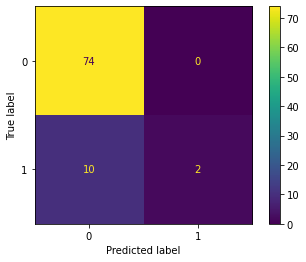

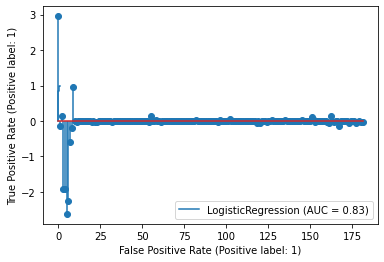

In [136]:
lr = LogisticRegression()
evaluate_measure(lr)
print("\n\n")

w_cof = lr.coef_
get_heighest_coefficiant(w_cof)

add_model_summary("LogReg Before Tunning", lr)

### [Logistic Regression Tuning](#logreg_tuning)

Fitting 7 folds for each of 36 candidates, totalling 252 fits
 confusion_matrix: 
[[74  0]
 [ 4  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.67      0.80        12

    accuracy                           0.95        86
   macro avg       0.97      0.83      0.89        86
weighted avg       0.96      0.95      0.95        86

f1_score : 
0.8


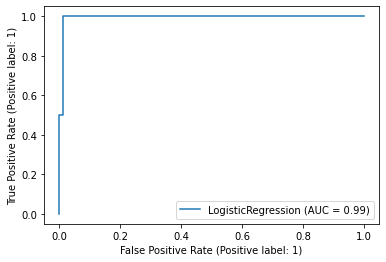

In [114]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['none','l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}
LR_search = GridSearchCV(LR, param_grid = LRparam_grid, refit = True, verbose = 1, cv=7)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)

paralist = []
paralist = list(LR_search.best_params_.values())

lr = LogisticRegression(C= LR_search.best_params_['C'] , penalty= LR_search.best_params_['penalty'], 
                        solver= LR_search.best_params_['solver'])
evaluate_measure(lr)

add_model_summary("Logistic Regression after tuning", lr)

***
### Naive Bayes 

-------------------- Evaluation --------------------
 confusion_matrix: 
[[33 41]
 [ 0 12]]
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        74
           1       0.23      1.00      0.37        12

    accuracy                           0.52        86
   macro avg       0.61      0.72      0.49        86
weighted avg       0.89      0.52      0.58        86

f1_score : 
0.36923076923076925
-------------------- Test --------------------
 confusion_matrix: 
[[33 41]
 [ 0 12]]
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        74
           1       0.23      1.00      0.37        12

    accuracy                           0.52        86
   macro avg       0.61      0.72      0.49        86
weighted avg       0.89      0.52      0.58        86

f1_score : 
0.36923076923076925
-------------------- The heighest Weights --------------

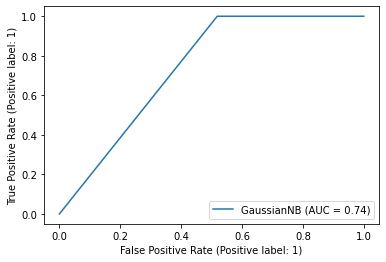

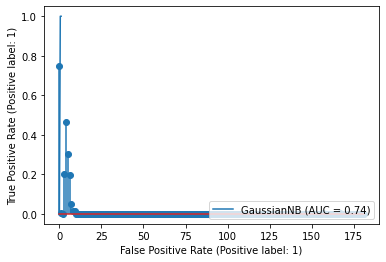

In [115]:
gnb = GaussianNB()
print(f"{'-' * 20} Evaluation {'-'* 20}")
evaluate_measure(gnb)
print(f"{'-' * 20} Test {'-'* 20}")
test_model(gnb)
print(f"{'-'* 20} The heighest Weights {'-'* 20}")
w_cof = gnb.theta_
get_heighest_coefficiant(w_cof)


add_model_summary("GaussianNB", gnb)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
 confusion_matrix: 
[[67  7]
 [ 2 10]]
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        74
           1       0.59      0.83      0.69        12

    accuracy                           0.90        86
   macro avg       0.78      0.87      0.81        86
weighted avg       0.92      0.90      0.90        86

f1_score : 
0.6896551724137931


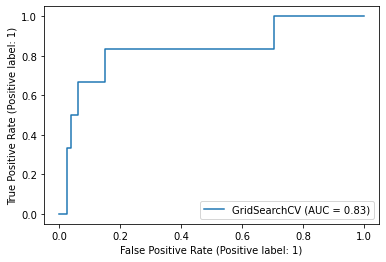

In [116]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
evaluate_measure(nbModel_grid)

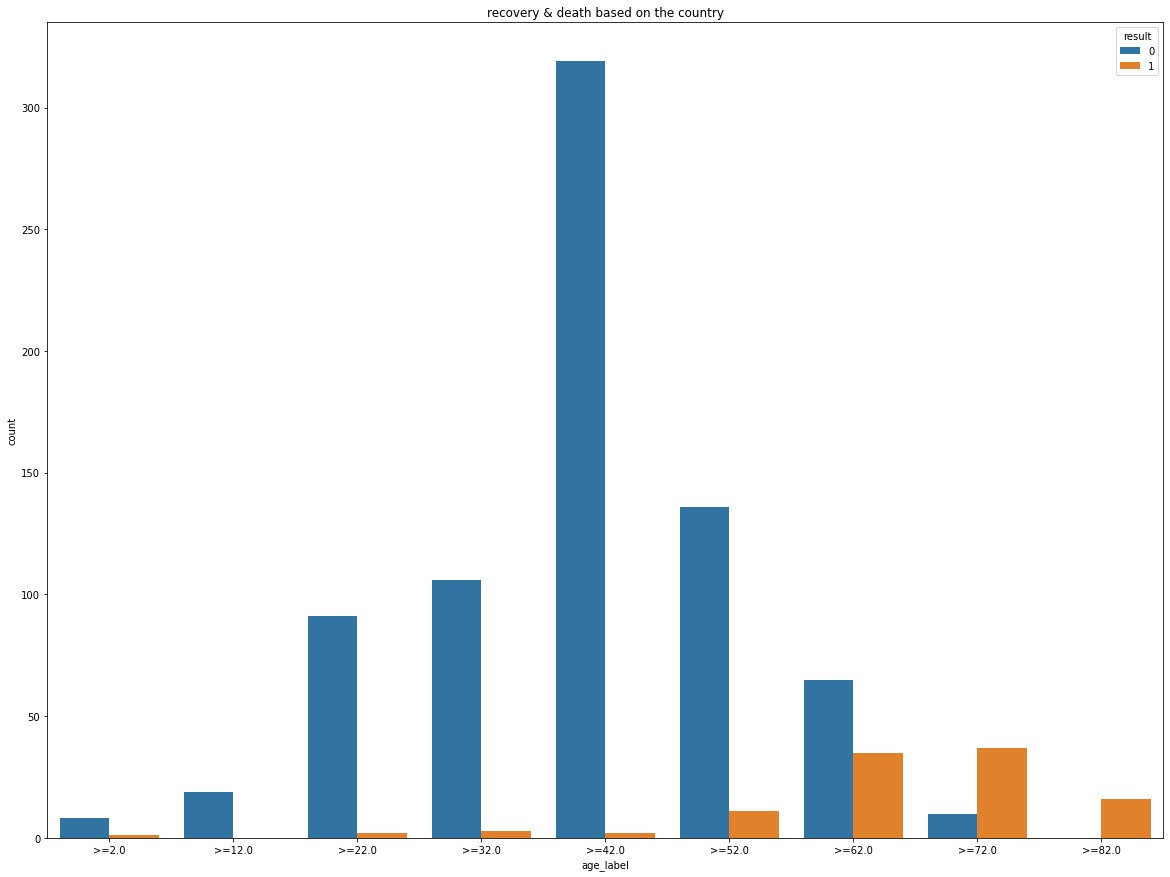

In [117]:
age_ranges = np.arange(df['age'].min(), df["age"].max(), 10)
age_labels =  [f">={age_ranges[i-1]}" for i in range(1,age_ranges.shape[0])]
age_ranges.shape, len(age_labels)
data["age_label"] = pd.cut(data["age"], bins= age_ranges,labels= age_labels)
fig = plt.figure(figsize=(20, 15))
ax = sns.countplot(x= "age_label", hue= "result", data= data);
ax.set_title("recovery & death based on the country");

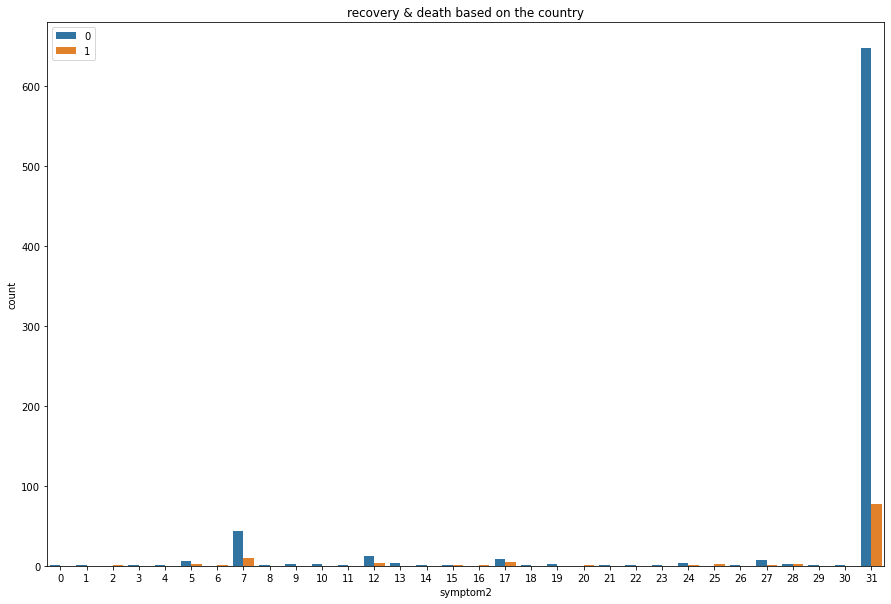

In [118]:
fig = plt.figure(figsize=(15, 10))
ax = sns.countplot(x= "symptom2", hue= "result", data= data);
ax.set_title("recovery & death based on the country");
plt.legend(loc="upper left")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
-------------------- Evaluation --------------------
 confusion_matrix: 
[[70  4]
 [ 7  5]]
classification_report: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        74
           1       0.56      0.42      0.48        12

    accuracy                           0.87        86
   macro avg       0.73      0.68      0.70        86
weighted avg       0.86      0.87      0.86        86

f1_score : 
0.4761904761904762
-------------------- Test --------------------
 confusion_matrix: 
[[70  4]
 [ 7  5]]
classification_report: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        74
           1       0.56      0.42      0.48        12

    accuracy                           0.87        86
   macro avg       0.73      0.68      0.70        86
weighted avg       0.86      0.87      0.86        86

f1_score : 
0.476190476190

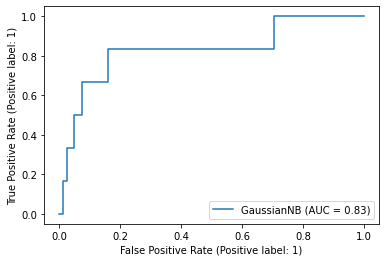

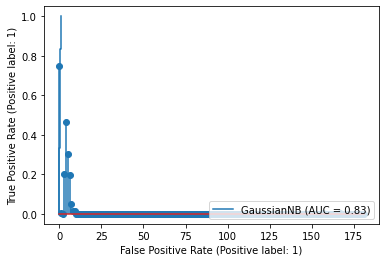

In [119]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid = params_NB, verbose=1, scoring='accuracy') 
gs_NB.fit(X_train, y_train)

var_value = gs_NB.best_params_.get('var_smoothing')
gnb = GaussianNB(var_smoothing = var_value)

print(f"{'-' * 20} Evaluation {'-'* 20}")
evaluate_measure(gnb)
print(f"{'-' * 20} Test {'-'* 20}")
test_model(gnb)
print(f"\n\n{'-'* 20} The heighest Weights {'-'* 20}")
w_cof = gnb.theta_
get_heighest_coefficiant(w_cof)

add_model_summary("GaussianNB after Tunning", gnb)

***
### Decission tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus

-------------------- Evaluation --------------------
 confusion_matrix: 
[[72  2]
 [ 3  9]]
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.82      0.75      0.78        12

    accuracy                           0.94        86
   macro avg       0.89      0.86      0.87        86
weighted avg       0.94      0.94      0.94        86

f1_score : 
0.7826086956521738


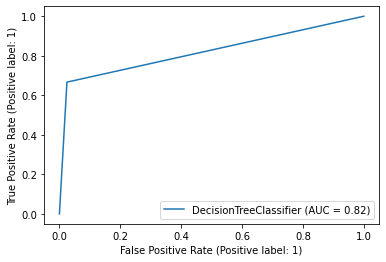

In [121]:
dtree = DecisionTreeClassifier(random_state=3)
print(f"{'-' * 20} Evaluation {'-'* 20}")
evaluate_measure(dtree)

add_model_summary("DT Before Tunning", dtree)

Fitting 7 folds for each of 392 candidates, totalling 2744 fits
 confusion_matrix: 
[[73  1]
 [ 3  9]]
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.90      0.75      0.82        12

    accuracy                           0.95        86
   macro avg       0.93      0.87      0.90        86
weighted avg       0.95      0.95      0.95        86

f1_score : 
0.8181818181818182


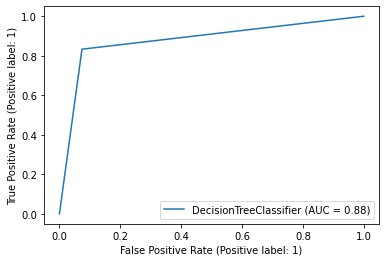

In [122]:
dtreeparam_grid = {
    'max_depth': np.arange(1,15),
    'max_features': np.arange(1,15),
    'random_state': [3],
    'criterion': ['gini', 'entropy']
}
dtree_search = GridSearchCV(dtree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=7)
dtree_search.fit(X_train , y_train)

dtree = DecisionTreeClassifier(criterion= dtree_search.best_params_['criterion'] , max_depth= dtree_search.best_params_['max_depth'], 
                               max_features = dtree_search.best_params_['max_features'], random_state=3)
evaluate_measure(dtree)

add_model_summary("DT after Tunning", dtree)

***
# Support Vector Machine

 confusion_matrix: 
[[74  0]
 [12  0]]
classification_report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        74
           1       0.00      0.00      0.00        12

    accuracy                           0.86        86
   macro avg       0.43      0.50      0.46        86
weighted avg       0.74      0.86      0.80        86

f1_score : 
0.0


TypeError: predict() missing 1 required positional argument: 'X'

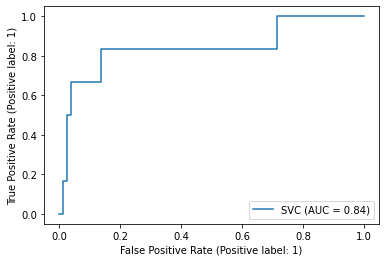

In [124]:
from sklearn.svm import SVC
svc = SVC()
evaluate_measure(svc)
add_model_summary("SVC Before Tunning", SVC)

In [ ]:
svcparam_grid = {
    'kernel': ['poly','rbf','sigmoid'],
    'degree': np.arange(1,10),
    'random_state':[3],
    'C': np.arange(0,2),
    'gamma':['scale', 'auto']
}
svc_search = GridSearchCV(svc, param_grid = svcparam_grid, refit = True, verbose = 1, cv=4)
svc_search.fit(X_train , y_train)
paralist = []
paralist = list(svc_search.best_params_.values())

svc = SVC(C= svc_search.best_params_['C'], degree= svc_search.best_params_['degree'], gamma= svc_search.best_params_['gamma'], 
              kernel = svc_search.best_params_['kernel'], random_state=3)
evaluate_measure(svc)

In [ ]:
pd.DataFrame(models_desc)

### references 
- [imblanced dataset description](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)